<a href="https://colab.research.google.com/github/CarolineVicente/Machine_Learn/blob/main/classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
identificacoes_treino.min()
identificacoes_treino.max()

np.uint8(9)

Exibição dos dados

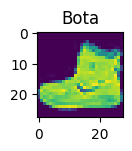

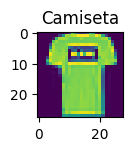

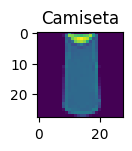

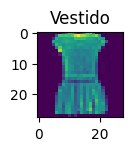

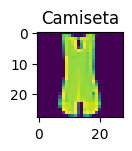

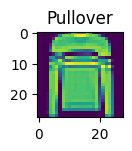

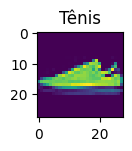

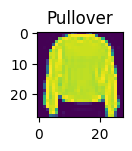

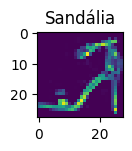

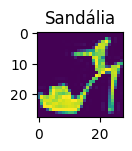

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

# plt.imshow(imagens_treino[0])
# plt.title(identificacoes_treino[0])
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
  plt.show()
  plt.colorbar


Normalizando as Imagens

In [5]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [24]:
modelo = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)),
                            keras.layers.Dense(512, activation='relu'),
                            keras.layers.Dropout(0.3),
                            keras.layers.Dense(256, activation='relu'),
                            keras.layers.Dropout(0.3),
                            keras.layers.Dense(10, activation='softmax')])

adam = keras.optimizers.Adam(learning_rate=0.002)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.keras',
                                             monitor='val_loss',
                                             save_best_only=True)]

modelo.compile(optimizer = adam,
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(imagens_treino,
                       identificacoes_treino,
                       batch_size=480,
                       epochs=5,
                       validation_split=0.2,
                       callbacks=callbacks)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.6664 - loss: 0.9329 - val_accuracy: 0.8481 - val_loss: 0.4261
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8416 - loss: 0.4416 - val_accuracy: 0.8597 - val_loss: 0.3808
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8577 - loss: 0.3905 - val_accuracy: 0.8642 - val_loss: 0.3719
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8636 - loss: 0.3762 - val_accuracy: 0.8700 - val_loss: 0.3560
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8695 - loss: 0.3547 - val_accuracy: 0.8743 - val_loss: 0.3350


Sumário do Modelo

In [7]:
sumario_do_modelo = modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)

Pesos da primeira camada Dense


In [8]:
pesos_camada_dense = modelo.layers[1].get_weights() #multiplicação de matrizes
pesos_camada_dense

[array([[ 0.04580565,  0.06909189,  0.0070809 , ..., -0.05517352,
          0.03460727,  0.06253569],
        [ 0.04596889, -0.09405305, -0.02780377, ...,  0.02571021,
         -0.00754056,  0.05547502],
        [ 0.07810995, -0.08927348, -0.03864279, ...,  0.06923296,
          0.03448156,  0.08428641],
        ...,
        [ 0.01012018, -0.0398725 ,  0.02687162, ...,  0.11455464,
          0.09091213, -0.06582498],
        [ 0.06016771,  0.0688124 ,  0.02923295, ...,  0.23486966,
          0.01874123, -0.04512621],
        [ 0.00178722,  0.04375179,  0.01149138, ...,  0.08866401,
          0.05437368,  0.00988139]], dtype=float32),
 array([ 6.34819642e-02, -9.63654816e-02, -7.71367748e-04,  1.13916360e-01,
         8.45315754e-02,  7.75973126e-02, -1.27243185e-02,  2.36775920e-01,
         3.93016897e-02,  1.20387636e-01, -1.51841491e-01, -1.42895216e-02,
         1.96365565e-01,  1.94805995e-01, -3.18528824e-02, -2.15625688e-02,
        -2.01160703e-02, -1.00755151e-02,  1.32169396e

In [9]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense # são as medidas que mostram se estamos próximos ou distantes de conseguir o resultado esperado

array([ 6.34819642e-02, -9.63654816e-02, -7.71367748e-04,  1.13916360e-01,
        8.45315754e-02,  7.75973126e-02, -1.27243185e-02,  2.36775920e-01,
        3.93016897e-02,  1.20387636e-01, -1.51841491e-01, -1.42895216e-02,
        1.96365565e-01,  1.94805995e-01, -3.18528824e-02, -2.15625688e-02,
       -2.01160703e-02, -1.00755151e-02,  1.32169396e-01, -1.68822169e-01,
       -1.48249548e-02,  2.50225842e-01,  1.86484382e-02,  1.06656849e-01,
        6.70428621e-03, -2.17813611e-01,  1.75452605e-01,  1.40913382e-01,
        1.04731075e-01, -1.75549127e-02, -1.06758403e-03, -5.46948723e-02,
       -2.99448948e-02,  1.43279061e-02,  5.51362410e-02,  2.91328710e-02,
        9.08796210e-03,  1.37836710e-01,  8.38690549e-02,  1.56138450e-01,
       -1.23655843e-02, -1.94041152e-02, -2.06082121e-01, -3.07238102e-01,
        1.54734388e-01,  3.39507386e-02,  1.98525488e-02,  1.22868083e-02,
        3.01973820e-02, -3.44785377e-02,  1.89292416e-01, -4.60409606e-03,
       -1.18439309e-02,  

Salavando e carregando o modelo treinado

In [10]:
modelo.save('modelo.keras')
modelo_salvo = load_model('modelo.keras', custom_objects={'softmax_v2': tf.nn.softmax})

Vizualizando as acurácias de treino e validação por épocas

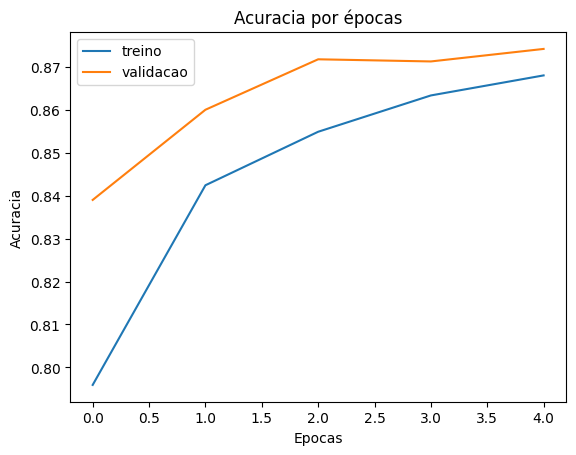

In [17]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por épocas')
plt.xlabel('Epocas')
plt.ylabel('Acuracia')
plt.legend(['treino', 'validacao'])

Vizualizando as perdas de treino e validação por épocas

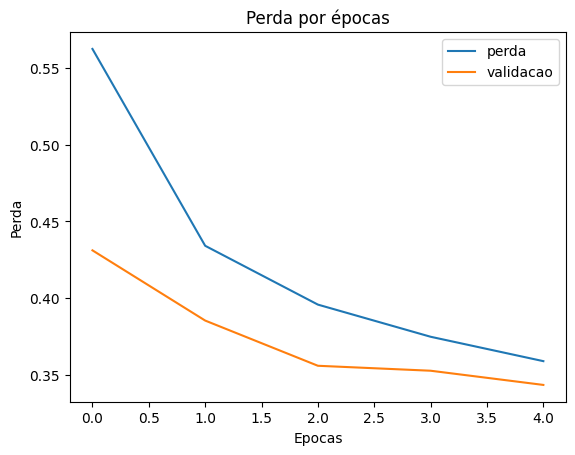

In [18]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Epocas')
plt.ylabel('Perda')
plt.legend(['perda', 'validacao'])

Testando o modelo e o modelo salvo

In [13]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[5]))
print('numero identificacao da imagem:', identificacoes_teste[5])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes_modelo_salvo[5]))
print('numero identificacao da imagem:', identificacoes_teste[5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
resultado teste: 1
numero identificacao da imagem: 1
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
resultado teste: 1
numero identificacao da imagem: 1


In [14]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acuracia do teste: ', acuracia_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8526 - loss: 38.9443
Perda do teste:  40.669395446777344
Acuracia do teste:  0.8518000245094299
